# Differences between sampling rates

> this file will be used to look at the QUANTITATIVE differences between the 60Hz sampling rate and the 1Hz

In [16]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# build the filepaths and dataframes
subjects = ["sub-7059", "sub-7058", "sub-7057"]
def insert(sub):
    return f"/mnt/lss/Projects/BOOST/ObservationalStudy/3-experiment/data/act-obs-test/derivatives/GGIR-3.2.6-test-ncp-sleep2/{sub}/accel/output_accel/results/part5_daysummary_MM_L44.8M100.6V428.8_T5A5.csv"
sixty_hz_file = "/mnt/lss/Users/zak/out/output_ggir/results/part5_daysummary_MM_L44.8M100.6V428.8_T5A5.csv"

In [18]:
original_files = []
for sub in subjects:
    original_files.append(insert(sub))
original_files

['/mnt/lss/Projects/BOOST/ObservationalStudy/3-experiment/data/act-obs-test/derivatives/GGIR-3.2.6-test-ncp-sleep2/sub-7059/accel/output_accel/results/part5_daysummary_MM_L44.8M100.6V428.8_T5A5.csv',
 '/mnt/lss/Projects/BOOST/ObservationalStudy/3-experiment/data/act-obs-test/derivatives/GGIR-3.2.6-test-ncp-sleep2/sub-7058/accel/output_accel/results/part5_daysummary_MM_L44.8M100.6V428.8_T5A5.csv',
 '/mnt/lss/Projects/BOOST/ObservationalStudy/3-experiment/data/act-obs-test/derivatives/GGIR-3.2.6-test-ncp-sleep2/sub-7057/accel/output_accel/results/part5_daysummary_MM_L44.8M100.6V428.8_T5A5.csv']

In [19]:
original_dfs = []
for file in original_files:
    df = pd.read_csv(file)
    original_dfs.append(df)

In [20]:
activity_cycles = [
    'dur_spt_sleep_min',
    'dur_day_total_IN_min',
    'dur_day_total_LIG_min',
    'dur_day_total_MOD_min',
    'dur_day_total_VIG_min',
    'ID',
    'calendar_date'
]
if original_dfs:
    original_dfs = [df[activity_cycles] for df in original_dfs]

In [21]:
new_df = pd.read_csv(sixty_hz_file)
new_df = new_df[new_df['ID'].isin(['sub-7057_ses-1_accel', 'sub-7058_ses-1_accel', 'sub-7059_ses-1_accel'])]
new_df = new_df[activity_cycles]
new_df.reset_index(drop=True)

dur_spt_sleep_min  dur_day_total_IN_min  dur_day_total_LIG_min  \
0               0.000               728.333                108.917   
1             229.000               956.250                156.667   
2             481.000               605.083                117.583   
3             262.417               939.000                133.083   
4             391.667               729.917                119.583   
5             179.750               854.167                169.250   
6             184.750               998.833                122.250   
7             463.667               527.250                208.500   
8             407.500               738.417                173.167   
9             452.500               700.500                134.833   
10            432.750               665.083                151.500   
11            423.250               727.500                160.417   
12            337.250               837.000                151.083   
13            188.667               879.000                147.833   
14            420.167               721.333                124.417   
15            271.417               758.583                126.583   
16            369.583               764.917                130.167   
17            453.000               622.333                155.083   
18            298.583               918.083                129.250   
19            363.250               762.083                122.583   

    dur_day_total_MOD_min  dur_day_total_VIG_min                    ID  \
0                  32.083                  0.667  sub-7057_ses-1_accel   
1                  51.250                  0.500  sub-7057_ses-1_accel   
2                 109.583                  1.917  sub-7057_ses-1_accel   
3                  74.417                  0.750  sub-7057_ses-1_accel   
4                 101.667                  0.500  sub-7057_ses-1_accel   
5                  44.000                  0.750  sub-7057_ses-1_accel   
6                 109.583                  1.917  sub-7058_ses-1_accel   
7                 135.083                  2.667  sub-7058_ses-1_accel   
8                  93.833                  1.333  sub-7058_ses-1_accel   
9                 100.750                  3.167  sub-7058_ses-1_accel   
10                119.583                  6.167  sub-7058_ses-1_accel   
11                114.750                  2.583  sub-7058_ses-1_accel   
12                 87.083                  0.583  sub-7058_ses-1_accel   
13                199.500                  8.583  sub-7059_ses-1_accel   
14                150.000                  1.167  sub-7059_ses-1_accel   
15                224.333                 16.333  sub-7059_ses-1_accel   
16                144.250                  0.750  sub-7059_ses-1_accel   
17                168.167                 15.417  sub-7059_ses-1_accel   
18                 87.250                  0.667  sub-7059_ses-1_accel   
19                133.583                 14.667  sub-7059_ses-1_accel   

   calendar_date  
0     2025-02-16  
1     2025-02-17  
2     2025-02-18  
3     2025-02-19  
4     2025-02-20  
5     2025-02-21  
6     2025-02-21  
7     2025-02-22  
8     2025-02-23  
9     2025-02-24  
10    2025-02-25  
11    2025-02-26  
12    2025-02-27  
13    2025-02-25  
14    2025-02-26  
15    2025-02-27  
16    2025-02-28  
17    2025-03-01  
18    2025-03-02  
19    2025-03-03

In [22]:
new_dfs = []
for eyed in new_df['ID'].unique():
    new_dfs.append(new_df[new_df['ID']==eyed])
for df in new_dfs:
    df = df.reset_index(drop=True)
new_dfs[2].head()

dur_spt_sleep_min  dur_day_total_IN_min  dur_day_total_LIG_min  \
18            188.667               879.000                147.833   
19            420.167               721.333                124.417   
20            271.417               758.583                126.583   
21            369.583               764.917                130.167   
22            453.000               622.333                155.083   

    dur_day_total_MOD_min  dur_day_total_VIG_min                    ID  \
18                199.500                  8.583  sub-7059_ses-1_accel   
19                150.000                  1.167  sub-7059_ses-1_accel   
20                224.333                 16.333  sub-7059_ses-1_accel   
21                144.250                  0.750  sub-7059_ses-1_accel   
22                168.167                 15.417  sub-7059_ses-1_accel   

   calendar_date  
18    2025-02-25  
19    2025-02-26  
20    2025-02-27  
21    2025-02-28  
22    2025-03-01

In [23]:
# Initialize a list to store the paired and filtered DataFrames
paired_dfs = []

# Iterate through the DataFrames in original_dfs and new_dfs
for orig_df, new_df in zip(original_dfs, new_dfs):
    # Ensure both DataFrames have the required columns
    if 'ID' in orig_df.columns and 'calendar_date' in orig_df.columns and \
       'ID' in new_df.columns and 'calendar_date' in new_df.columns:
        
        # Merge DataFrames on 'ID' to create pairs
        merged_df = pd.merge(orig_df, new_df, on='ID', suffixes=('_orig', '_new'))
        
        # Find common calendar dates
        common_dates = set(orig_df['calendar_date']).intersection(set(new_df['calendar_date']))
        
        # Filter rows where calendar_date is in both DataFrames
        filtered_orig = orig_df[orig_df['calendar_date'].isin(common_dates)].copy()
        filtered_new = new_df[new_df['calendar_date'].isin(common_dates)].copy()
        
        # Store the filtered DataFrames as a pair
        paired_dfs.append((filtered_orig, filtered_new))
    else:
        print(f"Warning: One or both DataFrames lack 'ID' or 'calendar_date' columns")

# Example: Inspect the first pair
if paired_dfs:
    print("First paired original DataFrame:")
    print(paired_dfs[0][0])
    print("\nFirst paired new DataFrame:")
    print(paired_dfs[0][1])

First paired original DataFrame:
Empty DataFrame
Columns: [dur_spt_sleep_min, dur_day_total_IN_min, dur_day_total_LIG_min, dur_day_total_MOD_min, dur_day_total_VIG_min, ID, calendar_date]
Index: []

First paired new DataFrame:
Empty DataFrame
Columns: [dur_spt_sleep_min, dur_day_total_IN_min, dur_day_total_LIG_min, dur_day_total_MOD_min, dur_day_total_VIG_min, ID, calendar_date]
Index: []


In [24]:
def peek(df, name):
    print(f"\n{name} dtypes:\n", df.dtypes)
    print(f"{name} ID sample:", df['ID'].astype(str).head().tolist())
    print(f"{name} date sample:", df['calendar_date'].head().tolist())
    print(f"{name} nunique IDs: {df['ID'].nunique()}, nunique dates: {df['calendar_date'].nunique()}")

for i,(orig_df,new_df) in enumerate(zip(original_dfs,new_dfs),1):
    print(f"\n--- Pair {i} ---")
    peek(orig_df, "orig")
    peek(new_df, "new")
    print("ID overlap size:", len(set(orig_df['ID'].astype(str)) & set(new_df['ID'].astype(str))))



--- Pair 1 ---

orig dtypes:
 dur_spt_sleep_min        float64
dur_day_total_IN_min     float64
dur_day_total_LIG_min    float64
dur_day_total_MOD_min    float64
dur_day_total_VIG_min    float64
ID                        object
calendar_date             object
dtype: object
orig ID sample: ['sub-7059_ses-1_accel', 'sub-7059_ses-1_accel', 'sub-7059_ses-1_accel', 'sub-7059_ses-1_accel', 'sub-7059_ses-1_accel']
orig date sample: ['2025-02-25', '2025-02-26', '2025-02-27', '2025-02-28', '2025-03-01']
orig nunique IDs: 1, nunique dates: 7

new dtypes:
 dur_spt_sleep_min        float64
dur_day_total_IN_min     float64
dur_day_total_LIG_min    float64
dur_day_total_MOD_min    float64
dur_day_total_VIG_min    float64
ID                        object
calendar_date             object
dtype: object
new ID sample: ['sub-7057_ses-1_accel', 'sub-7057_ses-1_accel', 'sub-7057_ses-1_accel', 'sub-7057_ses-1_accel', 'sub-7057_ses-1_accel']
new date sample: ['2025-02-16', '2025-02-17', '2025-02-18', '2025

In [25]:
import pandas as pd

def _clean(df):
    df = df.copy()
    if 'ID' not in df.columns or 'calendar_date' not in df.columns:
        return None
    df['ID'] = df['ID'].astype(str).str.strip()
    df['calendar_date'] = pd.to_datetime(df['calendar_date'], errors='coerce').dt.normalize()
    return df.dropna(subset=['calendar_date'])

def _overlap_score(o, n):
    # score by per-ID date matches (strongest signal of the right pair)
    common_ids = set(o['ID']) & set(n['ID'])
    if not common_ids:
        return 0
    score = 0
    for cid in list(common_ids):
        od = set(o.loc[o['ID'] == cid, 'calendar_date'])
        nd = set(n.loc[n['ID'] == cid, 'calendar_date'])
        score += len(od & nd)
    # tie-breaker: add small weight for ID overlap size
    score += 0.001 * len(common_ids)
    return score

def pair_and_filter_unordered(original_dfs, new_dfs, verbose=True):
    # clean all upfront
    O = [(_clean(df), i) for i, df in enumerate(original_dfs)]
    N = [(_clean(df), j) for j, df in enumerate(new_dfs)]
    O = [(df,i) for df,i in O if df is not None]
    N = [(df,j) for df,j in N if df is not None]

    used_new = set()
    pairs = []
    for o_df, oi in O:
        # find best matching new_df not yet used
        best = (-1, None, None)  # (score, n_df, nj)
        for n_df, nj in N:
            if nj in used_new:
                continue
            s = _overlap_score(o_df, n_df)
            if s > best[0]:
                best = (s, n_df, nj)

        score, n_df, nj = best
        if score <= 0 or n_df is None:
            if verbose:
                print(f"[warn] No viable match for original_dfs[{oi}] (no ID+date overlap).")
            continue

        used_new.add(nj)

        # inner-join on both keys to enforce alignment
        merged = pd.merge(
            o_df, n_df,
            on=['ID', 'calendar_date'],
            how='inner',
            suffixes=('_orig', '_new')
        )

        if merged.empty and verbose:
            # breadcrumbs to help debug
            id_overlap = set(o_df['ID']) & set(n_df['ID'])
            date_overlap = set(o_df['calendar_date']) & set(n_df['calendar_date'])
            print(f"[info] Matched oi={oi} → nj={nj} (score={score:.3f}) "
                  f"but inner merge empty. ID overlap={len(id_overlap)}, "
                  f"global date overlap={len(date_overlap)}.")

        # split back to two filtered views if you want that API
        filtered_orig = merged[[c for c in merged.columns if c.endswith('_orig')] + ['ID', 'calendar_date']]
        filtered_new  = merged[[c for c in merged.columns if c.endswith('_new')]  + ['ID', 'calendar_date']]
        pairs.append(((oi, filtered_orig), (nj, filtered_new)))

    return pairs

# Usage:
paired_dfs = pair_and_filter_unordered(original_dfs, new_dfs, verbose=True)

# Example inspect:
if paired_dfs:
    (oi, fo), (nj, fn) = paired_dfs[0]
    print(f"Original index {oi} filtered head:\n", fo.head())
    print(f"\nNew index {nj} filtered head:\n", fn.head())


Original index 0 filtered head:
    dur_spt_sleep_min_orig  dur_day_total_IN_min_orig  \
0                 271.000                    655.250   
1                 420.167                    727.250   
2                 270.917                    765.167   
3                 369.583                    767.167   
4                 453.167                    618.667   

   dur_day_total_LIG_min_orig  dur_day_total_MOD_min_orig  \
0                      139.00                     200.083   
1                      114.25                     154.000   
2                      114.75                     226.583   
3                      123.75                     148.250   
4                      149.50                     175.250   

   dur_day_total_VIG_min_orig                    ID calendar_date  
0                      10.000  sub-7059_ses-1_accel    2025-02-25  
1                       1.417  sub-7059_ses-1_accel    2025-02-26  
2                      19.333  sub-7059_ses-1_accel    2025

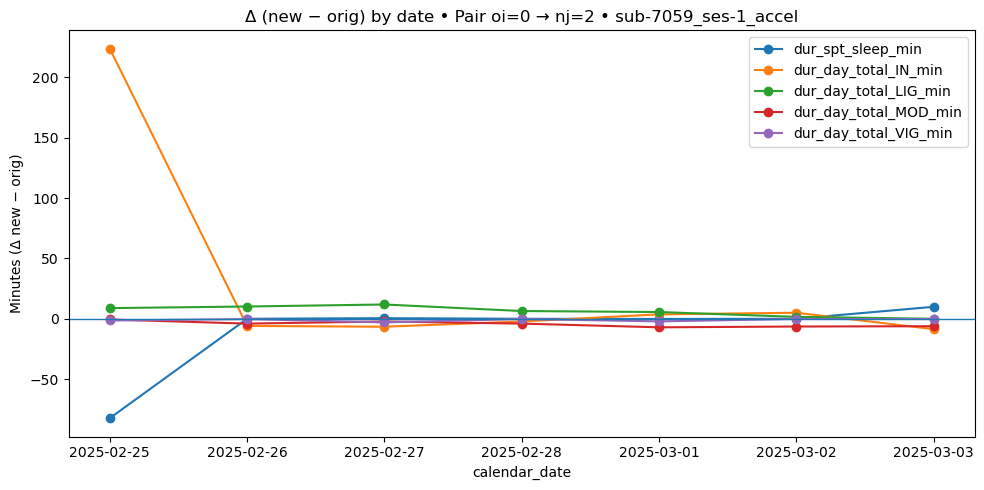

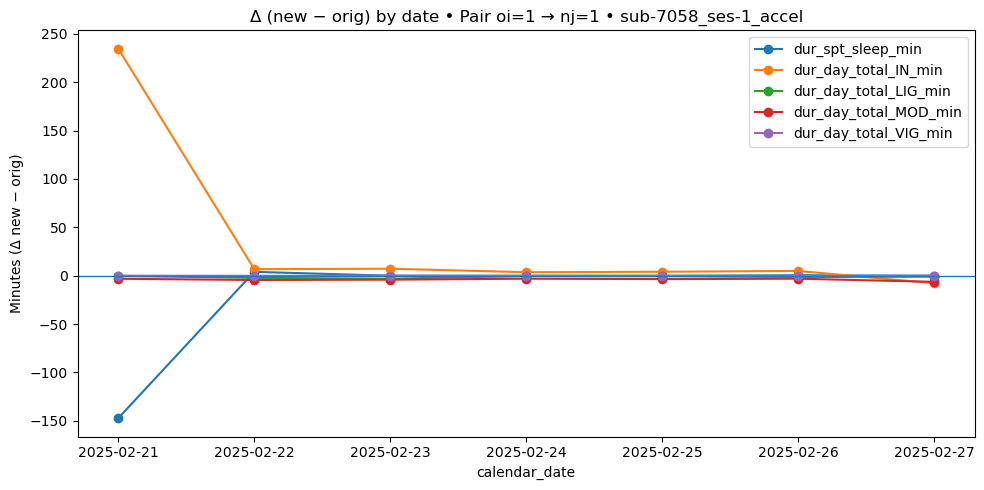

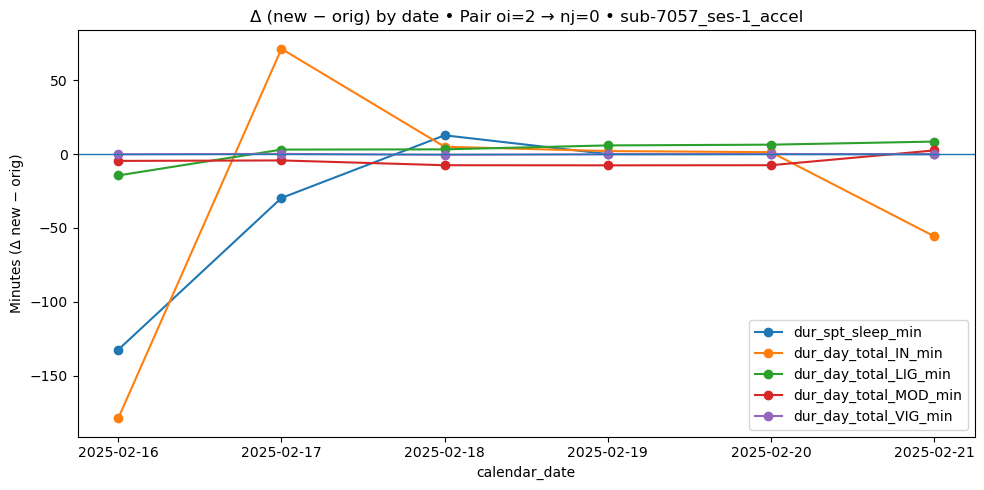

[done] Created 3 plot(s).


In [26]:

# metrics to compare
DUR_COLS = [
    "dur_spt_sleep_min",
    "dur_day_total_IN_min",
    "dur_day_total_LIG_min",
    "dur_day_total_MOD_min",
    "dur_day_total_VIG_min",
]
def plot_dur_differences(pairs, outdir=None, show=True):
    """
    pairs: list of ((orig_idx, filtered_orig_df), (new_idx, filtered_new_df))
           as returned by pair_and_filter_unordered(...)
    outdir: optional directory to save PNGs. If None, files aren't saved.
    show: whether to plt.show() each figure.
    """
    if outdir:
        os.makedirs(outdir, exist_ok=True)

    made = 0
    for (oi, fo), (nj, fn) in pairs:
        if fo.empty or fn.empty:
            print(f"[skip] Empty filtered DataFrame for pair oi={oi}, nj={nj}")
            continue

        # Merge the two filtered views back together on keys
        merged = pd.merge(
            fo, fn,
            on=["ID", "calendar_date"],
            how="inner",
            suffixes=("_orig", "_new")
        )
        if merged.empty:
            print(f"[skip] Inner merge empty for pair oi={oi}, nj={nj}")
            continue

        # Ensure datetime + sort
        merged["calendar_date"] = pd.to_datetime(merged["calendar_date"], errors="coerce")
        merged = merged.dropna(subset=["calendar_date"]).sort_values("calendar_date")

        # Build a tidy delta frame: date index, columns = metrics, values = (new - orig)
        delta = pd.DataFrame({"calendar_date": merged["calendar_date"].values})
        for col in DUR_COLS:
            ocol = f"{col}_orig"
            ncol = f"{col}_new"
            # if a metric is missing on either side, fill with NaN to avoid KeyError
            if ocol not in merged.columns or ncol not in merged.columns:
                delta[col] = pd.NA
            else:
                delta[col] = merged[ncol] - merged[ocol]
        delta = delta.set_index("calendar_date")

        # Figure title bits
        ids = merged["ID"].dropna().unique().tolist()
        id_label = ids[0] if len(ids) == 1 else f"{len(ids)} IDs"
        title = f"Δ (new − orig) by date • Pair oi={oi} → nj={nj} • {id_label}"

        # Plot — one chart per pair, multiple lines (one per metric)
        plt.figure(figsize=(10, 5))
        for col in DUR_COLS:
            if col in delta.columns:
                # Let matplotlib choose default styles/colors; don't specify colors.
                plt.plot(delta.index, delta[col], marker="o", label=col)

        plt.axhline(0, linewidth=1)
        plt.title(title)
        plt.xlabel("calendar_date")
        plt.ylabel("Minutes (Δ new − orig)")
        plt.legend()
        plt.tight_layout()

        # Save if requested
        if outdir:
            # Safe filename: include oi, nj, and (optionally) single ID
            safe_id = ids[0] if len(ids) == 1 else "multi"
            fname = f"pair_{oi}_to_{nj}_{safe_id}.png"
            path = os.path.join(outdir, fname)
            plt.savefig(path, dpi=150)
            print(f"[saved] {path}")

        if show:
            plt.show()
        else:
            plt.close()

        made += 1

    print(f"[done] Created {made} plot(s).")

# Example usage:
plot_dur_differences(paired_dfs, show=True)

In [27]:
actilife5097 = pd.read_csv("/mnt/rdss/VossLab/Repositories/Accelerometer_Data/Test/1192_2-21-2025_Activity.xlsx/1192_2-21-2025_Activity_DailyDetailed.csv")
actilife5097.columns

Index(['Subject', 'Filename', 'Epoch', 'Weight (lbs)', 'Age', 'Gender', 'Date',
       'Day of Week', 'Day of Week Num',
       'Number of Freedson (1998) Bouts occurring in this day',
       'Number of Freedson (1998) Bouts starting in this day',
       'Number of Freedson (1998) Bouts ending in this day',
       'Total time of Freedson (1998) Bouts occurring in this day',
       'Total activity counts of Freedson (1998) Bouts occurring in this day',
       'Number of Sedentary Bouts occurring in this day',
       'Number of Sedentary Bouts starting in this day',
       'Number of Sedentary Bouts ending in this day',
       'Total time of Sedentary Bouts occurring in this day',
       'Number of Sedentary Breaks occurring in this day',
       'Number of Sedentary Breaks starting in this day',
       'Number of Sedentary Breaks ending in this day',
       'Total time of Sedentary Breaks occurring in this day', 'Sedentary',
       'Light', 'Moderate', 'Vigorous', 'Very Vigorous', '% in 

In [28]:
actilife5097 = actilife5097[['Date', 'Sedentary', 'Light', 'Moderate', 'Vigorous', 'Very Vigorous']]
actilife5097.to_clipboard()

In [29]:
test_5097 = new_dfs[1]
test_5097 = test_5097.drop(columns=['dur_spt_sleep_min'])
test_5097.to_clipboard()
test_5097

dur_day_total_IN_min  dur_day_total_LIG_min  dur_day_total_MOD_min  \
11               998.833                122.250                109.583   
12               527.250                208.500                135.083   
13               738.417                173.167                 93.833   
14               700.500                134.833                100.750   
15               665.083                151.500                119.583   
16               727.500                160.417                114.750   
17               837.000                151.083                 87.083   

    dur_day_total_VIG_min                    ID calendar_date  
11                  1.917  sub-7058_ses-1_accel    2025-02-21  
12                  2.667  sub-7058_ses-1_accel    2025-02-22  
13                  1.333  sub-7058_ses-1_accel    2025-02-23  
14                  3.167  sub-7058_ses-1_accel    2025-02-24  
15                  6.167  sub-7058_ses-1_accel    2025-02-25  
16                  2.583  sub-7058_ses-1_accel    2025-02-26  
17                  0.583  sub-7058_ses-1_accel    2025-02-27

In [30]:
actilife5097

Date  Sedentary  Light  Moderate  Vigorous  Very Vigorous
0  2/21/2025        773    489       171         0              0
1  2/22/2025        647    504       289         0              0
2  2/23/2025        689    576       175         0              0
3  2/24/2025        730    569       141         0              0
4  2/25/2025        624    604       212         0              0
5  2/26/2025        672    580       188         0              0
6  2/27/2025        666    611       163         0              0

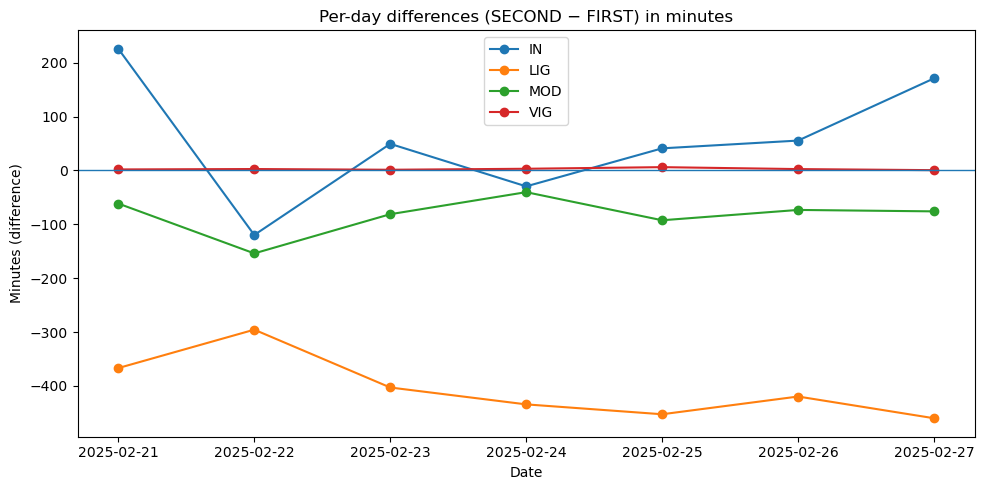

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

def compare_activity_dfs(df1_raw: pd.DataFrame, df2_raw: pd.DataFrame, show_plot=True):
    """
    df1_raw columns (example):
        ['Date','Sedentary','Light','Moderate','Vigorous','Very Vigorous']
    df2_raw columns:
        ['dur_day_total_IN_min','dur_day_total_LIG_min','dur_day_total_MOD_min',
         'dur_day_total_VIG_min','ID','calendar_date']

    Notes:
    - Sedentary ↔ IN
    - VIG in df1 is Vigorous + Very Vigorous
    - Differences are computed as: df2 (second table) − df1 (first table)
    """

    # --- standardize df1 to df2 schema ---
    df1 = df1_raw.copy()
    # parse date
    df1['calendar_date'] = pd.to_datetime(df1['Date'], errors='coerce').dt.normalize()
    # create minutes columns comparable to df2
    df1_std = pd.DataFrame({
        'calendar_date': df1['calendar_date'],
        'dur_day_total_IN_min': pd.to_numeric(df1['Sedentary'], errors='coerce'),
        'dur_day_total_LIG_min': pd.to_numeric(df1['Light'], errors='coerce'),
        'dur_day_total_MOD_min': pd.to_numeric(df1['Moderate'], errors='coerce'),
        'dur_day_total_VIG_min': pd.to_numeric(df1['Vigorous'], errors='coerce') \
                               + pd.to_numeric(df1['Very Vigorous'], errors='coerce'),
    })

    # --- standardize df2 ---
    df2 = df2_raw.copy()
    df2['calendar_date'] = pd.to_datetime(df2['calendar_date'], errors='coerce').dt.normalize()
    # keep only comparable columns
    keep = ['calendar_date','dur_day_total_IN_min','dur_day_total_LIG_min',
            'dur_day_total_MOD_min','dur_day_total_VIG_min']
    df2_std = df2[keep].copy()

    # --- compare only matching dates (inner merge on date) ---
    merged = pd.merge(df1_std, df2_std, on='calendar_date', how='inner', suffixes=('_df1','_df2'))
    merged = merged.sort_values('calendar_date')

    # If nothing matches, return empty and warn
    if merged.empty:
        print("[warn] No matching dates between the two dataframes after standardization.")
        return merged, merged

    # --- build differences: df2 − df1 ---
    diffs = pd.DataFrame({'calendar_date': merged['calendar_date']})
    cols = ['dur_day_total_IN_min','dur_day_total_LIG_min','dur_day_total_MOD_min','dur_day_total_VIG_min']
    for c in cols:
        diffs[c + '_diff'] = merged[c + '_df2'] - merged[c + '_df1']

    # --- plot differences over time (one chart, one line per activity) ---
    if show_plot:
        plt.figure(figsize=(10, 5))
        for c in cols:
            plt.plot(diffs['calendar_date'], diffs[c + '_diff'], marker='o', label=c.replace('dur_day_total_','').replace('_min','').upper())
        plt.axhline(0, linewidth=1)
        plt.title("Per-day differences (SECOND − FIRST) in minutes")
        plt.xlabel("Date")
        plt.ylabel("Minutes (difference)")
        plt.legend()
        plt.tight_layout()
        plt.show()

    # Also return a tidy differences table per day
    return merged, diffs
merged_aligned, diffs = compare_activity_dfs(actilife5097, test_5097, show_plot=True)


In [32]:
print(diffs)

  calendar_date  dur_day_total_IN_min_diff  dur_day_total_LIG_min_diff  \
0    2025-02-21                    225.833                    -366.750   
1    2025-02-22                   -119.750                    -295.500   
2    2025-02-23                     49.417                    -402.833   
3    2025-02-24                    -29.500                    -434.167   
4    2025-02-25                     41.083                    -452.500   
5    2025-02-26                     55.500                    -419.583   
6    2025-02-27                    171.000                    -459.917   

   dur_day_total_MOD_min_diff  dur_day_total_VIG_min_diff  
0                     -61.417                       1.917  
1                    -153.917                       2.667  
2                     -81.167                       1.333  
3                     -40.250                       3.167  
4                     -92.417                       6.167  
5                     -73.250                  

In [33]:
# quantify the times given in the google sheet into a df
ground_truth = pd.read_csv("ground_truth.csv")
ground_truth

sub        date   in  lig  mod  vig
0  sub-1_ses-1_accel  2025-08-18  330  260    0    0
1  sub-1_ses-1_accel  2025-08-19  450  290  120    0
2  sub-1_ses-1_accel  2025-08-20  480  385   30    0
3  sub-2_ses-1_accel  2025-08-18  570  150    0    0
4  sub-2_ses-1_accel  2025-08-19  810  180    0    0
5  sub-2_ses-1_accel  2025-08-20  810   60    0    0
6  sub-3_ses-1_accel  2025-08-18  390  180   60    0
7  sub-3_ses-1_accel  2025-08-19  660  390    0    0
8  sub-3_ses-1_accel  2025-08-20  330  720   60    0

In [34]:
"""
locations for actilife numbers
/mnt/rdss/VossLab/Repositories/Accelerometer_Data/ActivityFiles/Andersen_8-18-2025_Activity.xlsx
/mnt/rdss/VossLab/Repositories/Accelerometer_Data/ActivityFiles/Hinklin_8-18-2025_Activity.xlsx
/mnt/rdss/VossLab/Repositories/Accelerometer_Data/ActivityFiles/Voss_8-18-2025_Activity.xlsx
"""




'\nlocations for actilife numbers\n/mnt/rdss/VossLab/Repositories/Accelerometer_Data/ActivityFiles/Andersen_8-18-2025_Activity.xlsx\n/mnt/rdss/VossLab/Repositories/Accelerometer_Data/ActivityFiles/Hinklin_8-18-2025_Activity.xlsx\n/mnt/rdss/VossLab/Repositories/Accelerometer_Data/ActivityFiles/Voss_8-18-2025_Activity.xlsx\n'

In [35]:
tests = pd.read_csv(sixty_hz_file)
tests = tests[tests['ID'].isin(['sub-1_ses-1_accel','sub-2_ses-1_accel','sub-3_ses-1_accel'])]
tests

ID                filename    weekday calendar_date  \
0  sub-1_ses-1_accel  sub-1_ses-1_accel.gt3x    Tuesday    2025-08-19   
1  sub-2_ses-1_accel  sub-2_ses-1_accel.gt3x    Tuesday    2025-08-19   
2  sub-2_ses-1_accel  sub-2_ses-1_accel.gt3x  Wednesday    2025-08-20   
3  sub-3_ses-1_accel  sub-3_ses-1_accel.gt3x    Tuesday    2025-08-19   
4  sub-3_ses-1_accel  sub-3_ses-1_accel.gt3x  Wednesday    2025-08-20   

   window_number   start_end_window  sleeponset sleeponset_ts  wakeup  \
0              2  00:00:00-23:59:55      22.225      22:13:30  30.882   
1              2  00:00:00-23:59:55      22.581      22:34:50  31.610   
2              3  00:00:00-23:59:55         NaN           NaN  32.276   
3              2  00:00:00-23:59:55      21.528      21:31:40  28.350   
4              3  00:00:00-23:59:55         NaN           NaN  27.771   

  wakeup_ts  ...  Nblocks_day_total_VIG  boutcriter.in  boutcriter.lig  \
0  06:52:55  ...                    125            0.9             0.8   
1  07:36:35  ...                     19            0.9             0.8   
2  08:16:35  ...                      3            0.9             0.8   
3  04:21:00  ...                      3            0.9             0.8   
4  03:46:15  ...                      7            0.9             0.8   

  boutcriter.mvpa  boutdur.in  boutdur.lig  boutdur.mvpa  GGIRversion  \
0             0.8    30_20_10       10_5_1        10_5_1        3.2.6   
1             0.8    30_20_10       10_5_1        10_5_1        3.2.6   
2             0.8    30_20_10       10_5_1        10_5_1        3.2.6   
3             0.8    30_20_10       10_5_1        10_5_1        3.2.6   
4             0.8    30_20_10       10_5_1        10_5_1        3.2.6   

     lastDate  daytype  
0  2025-08-21       WD  
1  2025-08-21       WD  
2  2025-08-21       WD  
3  2025-08-21       WD  
4  2025-08-21       WD  

[5 rows x 116 columns]

In [46]:
all_cols = [
    'dur_spt_sleep_min',
    'dur_day_total_IN_min',
    'dur_day_total_LIG_min',
    'dur_day_total_MOD_min',
    'dur_day_total_VIG_min',
    'ID',
    'calendar_date'
]
tests = tests[all_cols]
# dur_day_ACT_unbt

In [51]:
def compare_activity_cycles(tests: pd.DataFrame,
                            ground_truth: pd.DataFrame,
                            subtract_sleep: bool = False):
    """
    Compare time (minutes) in activity cycles between `tests` and `ground_truth`
    on shared subject-days only. Optionally subtract sleep (from tests) from
    ground-truth IN before comparison.

    Parameters
    ----------
    tests : DataFrame
        Columns:
          - ID
          - calendar_date
          - dur_spt_sleep_min
          - dur_day_total_IN_min
          - dur_day_total_LIG_min
          - dur_day_total_MOD_min
          - dur_day_total_VIG_min
    ground_truth : DataFrame
        Columns:
          - sub
          - date
          - in, lig, mod, vig
    subtract_sleep : bool
        If True, ground-truth IN is adjusted as: gt_in_adj = max(gt_in - sleep_from_tests, 0).

    Returns
    -------
    diff_long : DataFrame
        Tidy table with columns: sub, date, cycle, diff_min (tests - ground_truth_adj),
        plus the original per-source values.
    fig : matplotlib.figure.Figure
        Figure with 4 small multiples showing differences by subject-day per cycle.
    """

    # --- Standardize columns ---
    t = tests.rename(columns={
        "ID": "sub",
        "calendar_date": "date",
        "dur_spt_sleep_min": "sleep",
        "dur_day_total_IN_min": "in",
        "dur_day_total_LIG_min": "lig",
        "dur_day_total_MOD_min": "mod",
        "dur_day_total_VIG_min": "vig",
    }).copy()

    # Ensure date types (date, not datetime)
    t["date"] = pd.to_datetime(t["date"]).dt.date
    gt = ground_truth.copy()
    gt["date"] = pd.to_datetime(gt["date"]).dt.date

    # Keep only needed cols
    t = t[["sub", "date", "sleep", "in", "lig", "mod", "vig"]]
    gt = gt[["sub", "date", "in", "lig", "mod", "vig"]]

    # Optional: subtract sleep from ground-truth IN using tests' sleep
    if subtract_sleep:
        gt_adj = gt.merge(t[["sub", "date", "sleep"]], on=["sub", "date"], how="left")
        gt_adj["in"] = (gt_adj["in"] - gt_adj["sleep"].fillna(0)).clip(lower=0)
        gt_adj = gt_adj.drop(columns=["sleep"])
    else:
        gt_adj = gt

    # --- Inner join on shared subject-days only ---
    merged = t.merge(gt_adj, on=["sub", "date"], suffixes=("_test", "_gt"))

    # Compute differences (tests - ground_truth_adj)
    for col in ["in", "lig", "mod", "vig"]:
        merged[f"diff_{col}"] = merged[f"{col}_test"] - merged[f"{col}_gt"]

    # Tidy output for analysis/plotting
    diff_long = (
        merged.melt(
            id_vars=["sub", "date"],
            value_vars=[f"diff_{c}" for c in ["in", "lig", "mod", "vig"]],
            var_name="cycle",
            value_name="diff_min",
        )
        .assign(cycle=lambda d: d["cycle"].str.replace("diff_", "", regex=False))
        .merge(
            merged[["sub","date","in_test","lig_test","mod_test","vig_test",
                    "in_gt","lig_gt","mod_gt","vig_gt"]],
            on=["sub","date"],
            how="left"
        )
    )

    # --- Visualization: small multiples (one panel per cycle) ---
    cycles = ["in", "lig", "mod", "vig"]
    fig, axes = plt.subplots(1, 4, figsize=(16, 4), sharey=True)
    for ax, cyc in zip(axes, cycles):
        d = diff_long[diff_long["cycle"] == cyc].copy()
        # x labels as `sub@date` to keep both keys visible
        d["label"] = d["sub"] + "@" + d["date"].astype(str)
        ax.axhline(0, lw=1, linestyle="--")
        ax.bar(d["label"], d["diff_min"])
        ax.set_title(cyc.upper())
        ax.set_xticklabels(d["label"], rotation=90)
        ax.set_ylabel("Difference (tests - ground_truth_adj) [min]")

    fig.suptitle("Activity-cycle differences on shared subject-days TESTS - GT", y=1.02)
    fig.tight_layout()
    return diff_long, fig


                 sub        date cycle  diff_min  in_test  lig_test  mod_test  \
0  sub-1_ses-1_accel  2025-08-19    in   110.333  560.333   149.333   152.417   
1  sub-2_ses-1_accel  2025-08-19    in  -111.250  698.750    88.000   108.583   
2  sub-2_ses-1_accel  2025-08-20    in   -45.000  765.000    85.583    62.417   
3  sub-3_ses-1_accel  2025-08-19    in   183.500  843.500   128.167    58.750   
4  sub-3_ses-1_accel  2025-08-20    in   541.000  871.000   210.917    78.583   

   vig_test  in_gt  lig_gt  mod_gt  vig_gt  
0    58.500    450     290     120       0  
1     2.917    810     180       0       0  
2     0.417    810      60       0       0  
3     0.250    660     390       0       0  
4    23.250    330     720      60       0  


/tmp/ipykernel_5947/2143596503.py:99: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(d["label"], rotation=90)
/tmp/ipykernel_5947/2143596503.py:99: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(d["label"], rotation=90)
/tmp/ipykernel_5947/2143596503.py:99: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(d["label"], rotation=90)
/tmp/ipykernel_5947/2143596503.py:99: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(d["label"], rotation=90)


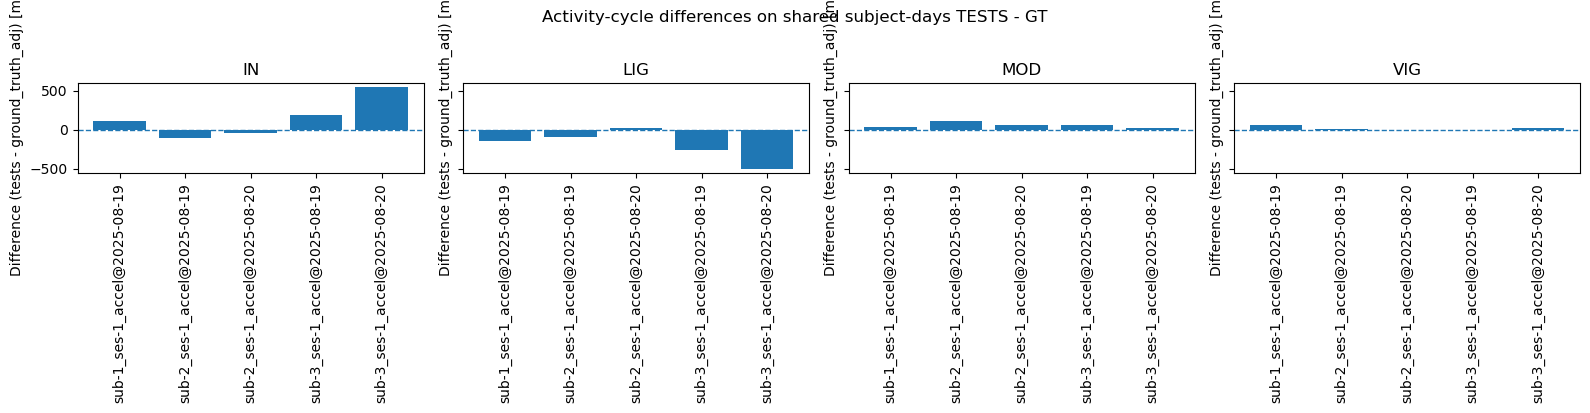

In [52]:
# Your example dataframes: tests_df, gt_df
diff_df, fig = compare_activity_cycles(tests, ground_truth, subtract_sleep=False)
print(diff_df.head())
plt.show()
diff_df.to_csv("diffs_gt.csv")

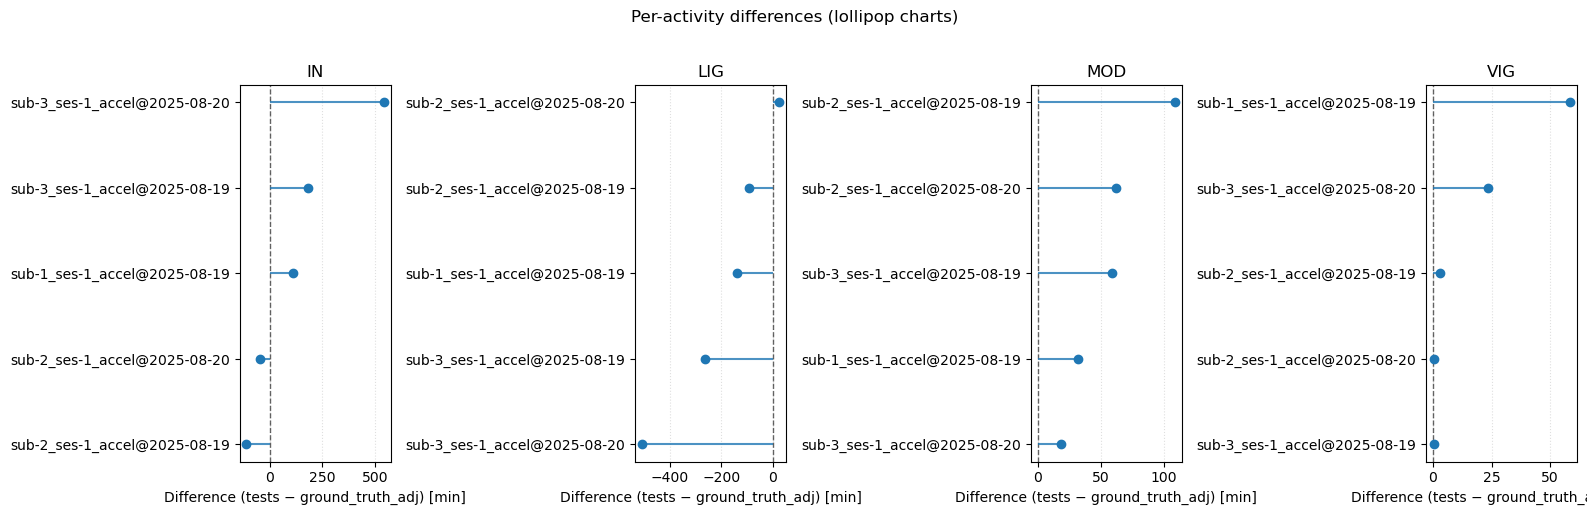

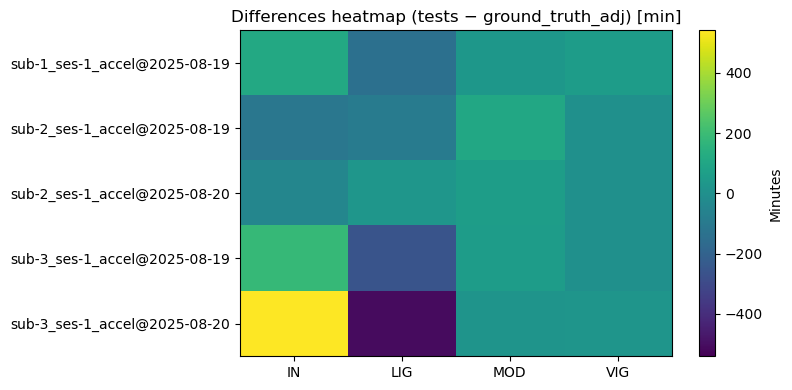

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

def plot_diffs_intuitive(folder: str | Path, diff_csv_name: str = "diffs_gt.csv"):
    """
    Reads diff_df.csv (columns: sub, date, cycle, diff_min, ...) from `folder`
    and produces:
      A) Lollipop charts per activity type (in/lig/mod/vig)
      B) Heatmap (subject@date × cycle) of differences

    Positive = tests > ground_truth_adj; Negative = tests < ground_truth_adj
    """
    folder = Path(folder)
    diff_path = folder / diff_csv_name
    df = pd.read_csv(diff_path)

    # ensure expected columns
    required = {"sub", "date", "cycle", "diff_min"}
    missing = required - set(df.columns)
    if missing:
        raise ValueError(f"diff_df is missing columns: {missing}")

    # Make a compact label for the x/y ticks
    df["label"] = df["sub"].astype(str) + "@" + pd.to_datetime(df["date"]).dt.date.astype(str)

    # --- A) Lollipop charts per cycle ---
    cycles = ["in", "lig", "mod", "vig"]
    # keep only known cycles (in case the CSV has extras)
    df = df[df["cycle"].isin(cycles)]

    fig, axes = plt.subplots(1, len(cycles), figsize=(16, 5), sharey=False)
    if len(cycles) == 1:
        axes = [axes]

    for ax, cyc in zip(axes, cycles):
        d = df[df["cycle"] == cyc].copy()

        # Sort by diff to make it readable
        d = d.sort_values("diff_min")
        y = np.arange(len(d))

        ax.axvline(0, color="black", lw=1, linestyle="--", alpha=0.6)
        # stems (lollipops)
        ax.hlines(y=y, xmin=0, xmax=d["diff_min"].to_numpy(), alpha=0.8)
        ax.plot(d["diff_min"].to_numpy(), y, "o")

        ax.set_title(cyc.upper())
        ax.set_xlabel("Difference (tests − ground_truth_adj) [min]")
        ax.set_yticks(y)
        ax.set_yticklabels(d["label"])
        ax.grid(axis="x", linestyle=":", alpha=0.4)

    fig.suptitle("Per-activity differences (lollipop charts)", y=1.02)
    fig.tight_layout()
    plt.show()

    # --- B) Heatmap overview ---
    # pivot to matrix: rows = subject@date, cols = cycle
    heat = (
        df.pivot_table(index="label", columns="cycle", values="diff_min", aggfunc="mean")
          .reindex(columns=cycles)  # consistent column order
          .sort_index()
    )

    # Normalize rows for visual spacing; just plot raw diffs.
    fig2, ax2 = plt.subplots(figsize=(8, max(4, 0.3 * len(heat))))
    im = ax2.imshow(heat.to_numpy(), aspect="auto")

    # Color center at 0 so positive/negative differences are obvious
    # If you want symmetric colors around zero:
    vmax = np.nanmax(np.abs(heat.to_numpy()))
    im.set_clim(-vmax, vmax)

    # Label ticks
    ax2.set_xticks(range(len(heat.columns)))
    ax2.set_xticklabels([c.upper() for c in heat.columns])
    ax2.set_yticks(range(len(heat.index)))
    ax2.set_yticklabels(heat.index)

    ax2.set_title("Differences heatmap (tests − ground_truth_adj) [min]")
    cbar = plt.colorbar(im, ax=ax2)
    cbar.set_label("Minutes")

    fig2.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Assuming both diff_df.csv and diff_gt.csv live in the same folder;
    # we only need diff_df.csv for these plots.
    plot_diffs_intuitive(".")
